# Basin Visualization

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib

plt.style.use('seaborn-whitegrid')
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import os
import warnings
warnings.filterwarnings('ignore')

In [7]:
base_dir = './data'
train_path = os.path.join(base_dir, 'train.csv')
test_path = os.path.join(base_dir, 'test.csv')

In [8]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

## 결측치확인

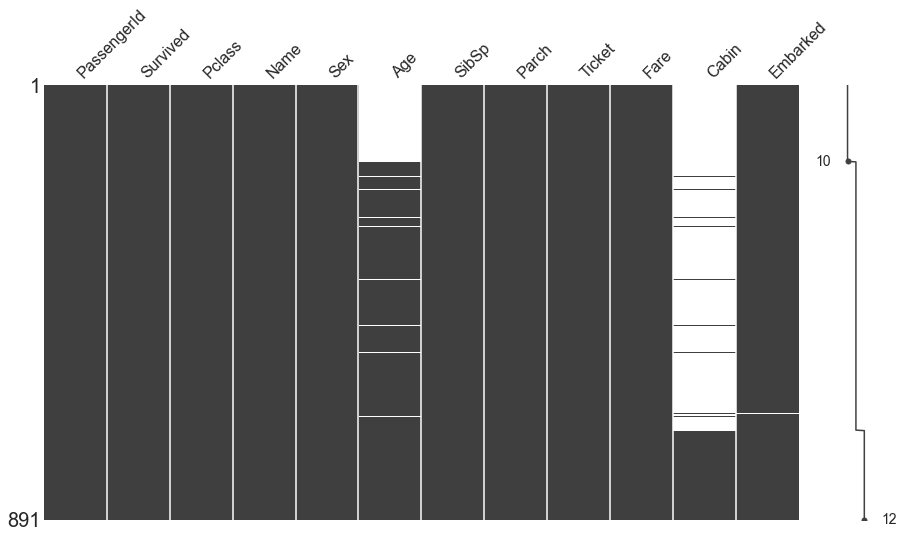

In [14]:
msno.matrix(train_data, figsize=(15, 8), sort='ascending')
plt.show()

## 상관분석

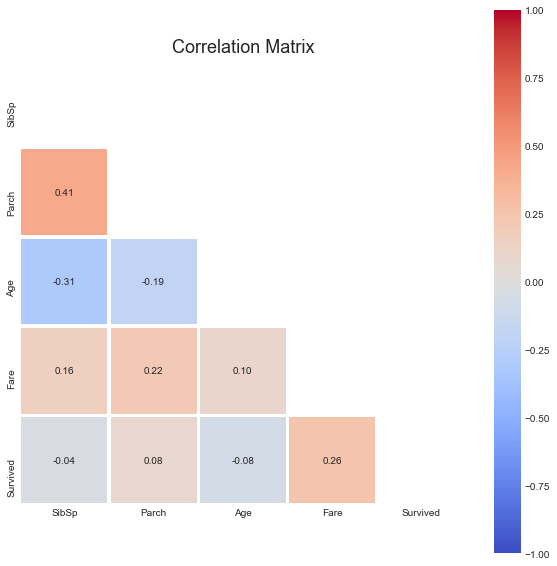

In [19]:
corr = train_data[['SibSp', 'Parch', 'Age', 'Fare', 'Survived']].corr() # 상관계수 계산

plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr, dtype=bool)) # 하삼각행렬 마스크 
sns.heatmap(corr, mask=mask, cmap='coolwarm',vmin=-1, vmax=1,
            square=True, linewidths=2.5, annot=True, fmt='.2f')
plt.title('Correlation Matrix', fontsize=18)
plt.show()

## 생존자 숫자 한 눈에 보기

In [131]:
survived_count['Survived']

0    549
1    342
Name: Survived, dtype: int64

In [47]:
survived_count = train_data['Survived'].value_counts().to_frame()
survived_count['%'] = (survived_count['Survived'])/ survived_count['Survived'].sum() * 100
survived_count

,Survived,%
0,549,61.616162
1,342,38.383838


### 막대 그래프에서 한번에 보기

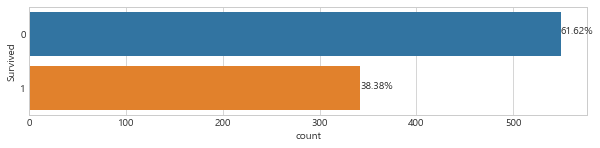

In [84]:
fig = plt.figure(figsize=(10, 2))
sns.countplot(data=train_data, y='Survived')
plt.text(survived_count['Survived'][0],0, f"{round(survived_count['%'][0], 2)}%")
plt.text(survived_count['Survived'][1],1, f"{round(survived_count['%'][1], 2)}%")
plt.show()

### 파이 그래프, 막대 그래ㅐ프 나눠 보기

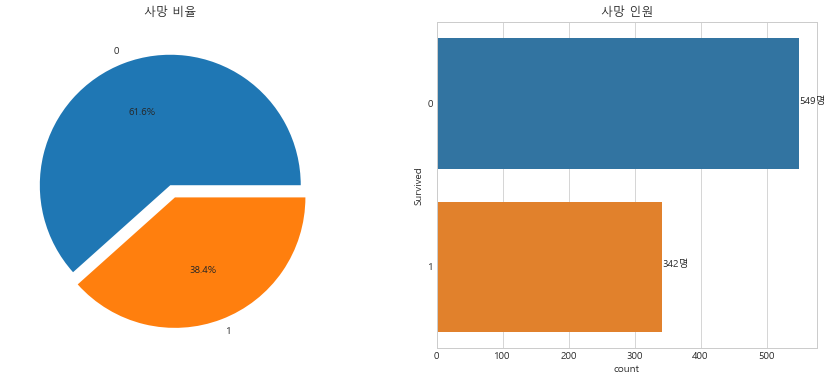

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

survived_count['%'].plot.pie(explode=[0,0.1], ax=ax[0], autopct='%1.1f%%')
ax[0].set_ylabel('')
ax[0].set_title('사망 비율')


sns.countplot(data=train_data, y='Survived', ax=ax[1])
ax[1].text(survived_count['Survived'][0],0, f"{survived_count['Survived'][0]}명")
ax[1].text(survived_count['Survived'][1],1, f"{survived_count['Survived'][1]}명")
ax[1].set_title('사망 인원')


plt.show()

## Pclass별 생존자 보기

### groupby로 보기

In [205]:
train_data.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

### seaborn countplot으로 보기

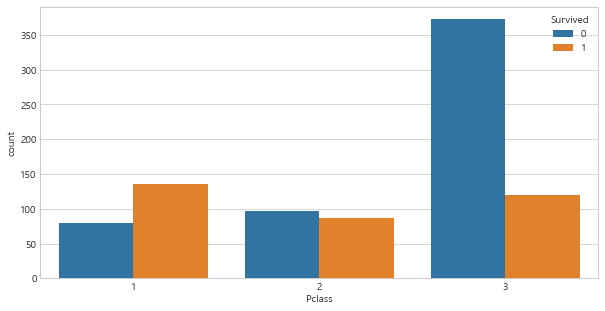

In [126]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.show()

### 크로스탭으로 보기

In [123]:
pd.crosstab(index=train_data.Pclass, columns=train_data.Survived, margins=True).style.background_gradient(cmap='summer_r')
# margins : subtotal


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


## Pclass에 대한 남녀 생존자 factorplot(pointplot)으로 보기

<Figure size 1440x288 with 0 Axes>

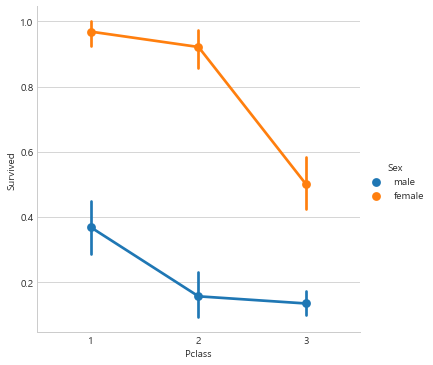

In [136]:
plt.figure(figsize=(20, 4))
sns.factorplot(data=train_data, x='Pclass', y='Survived', hue='Sex')
plt.show()

## Pclass 관련 생존자 비율 보기

###  kdeplot으로 비율보기
* 생존자 → class 별 비율(100%)
* 비생존자 → class 별 비율(100%)

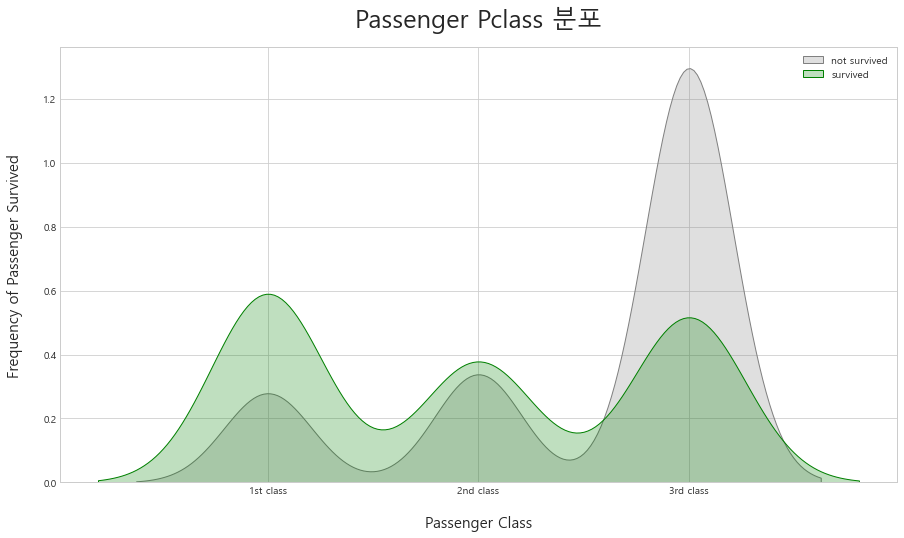

In [201]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=train_data.query('Survived==0').Pclass, color='gray', shade=True, label='not survived')
sns.kdeplot(data=train_data.query('Survived==1').Pclass, color='green', shade=True, label='survived')
plt.title('Passenger Pclass 분포', fontsize=25, pad=20)
plt.ylabel('Frequency of Passenger Survived', fontsize=15, labelpad=20)

plt.xlabel('Passenger Class', fontsize=15, labelpad=20)

plt.legend()
x_lables = ['1st class', '2nd class', '3rd class']
plt.xticks(sorted(train_data.Pclass.unique()), x_lables)
plt.show()

### barplot으로 비율보기

In [213]:
train_data.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

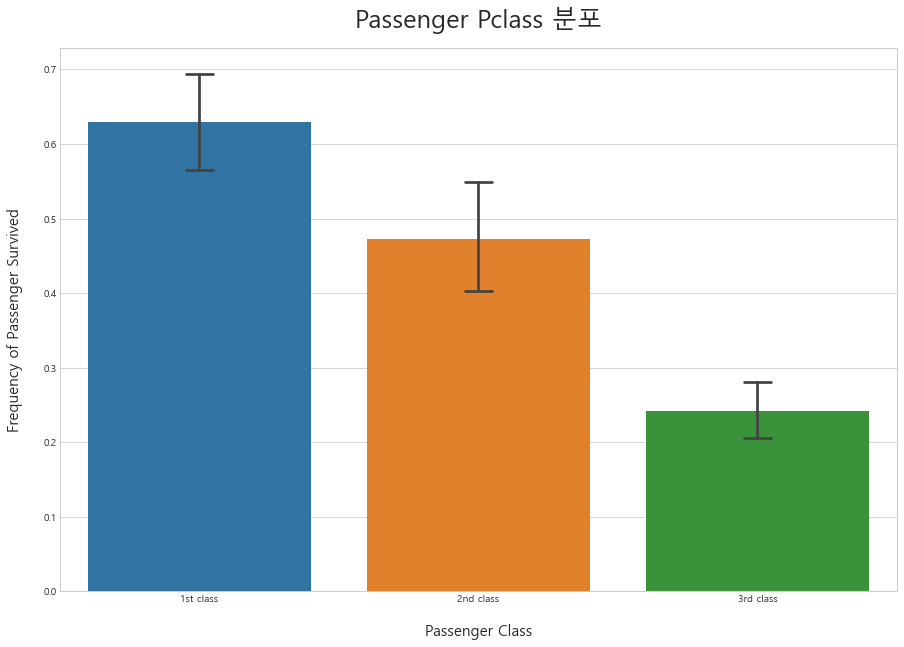

In [203]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=train_data, x='Pclass', y='Survived', capsize=.1,linewidth=5, ax=ax)

plt.title('Passenger Pclass 분포', fontsize=25, pad=20)
plt.ylabel('Frequency of Passenger Survived', fontsize=15, labelpad=20)

plt.xlabel('Passenger Class', fontsize=15, labelpad=20)
x_lables = ['1st class', '2nd class', '3rd class']
plt.xticks([0, 1, 2], x_lables)
plt.show()

## boxplot을 활용해 Pclass 별 Fare 

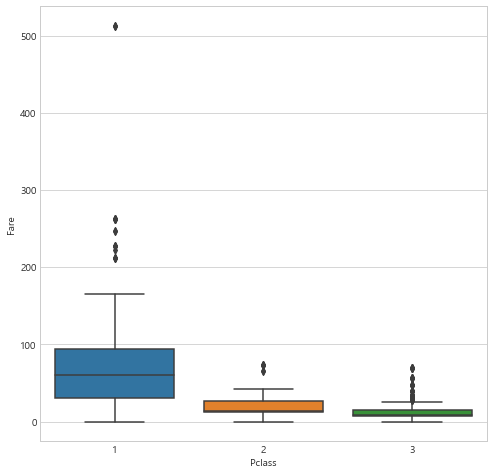

In [222]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=train_data, x='Pclass', y='Fare')
plt.show()

## 나이별 생존자 수 보기

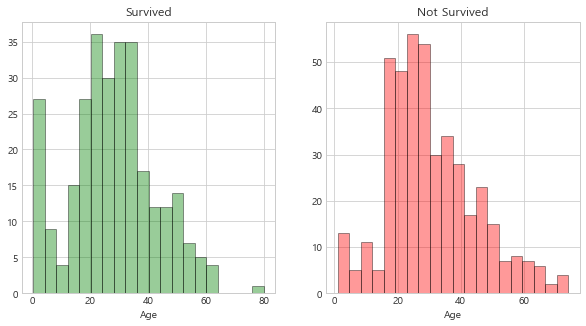

In [260]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.distplot(train_data.query('Survived==1').Age, ax=ax[0],  bins=20, kde=False, color='g', hist_kws={'edgecolor':'k'})

ax[0].set_title('Survived')

sns.distplot(train_data.query('Survived==0').Age, ax=ax[1],  bins=20, kde=False, color='r', hist_kws={'edgecolor':'k'})
ax[1].set_title('Not Survived')

plt.show()

## 남녀별 나이별 생존자 숫자 보기

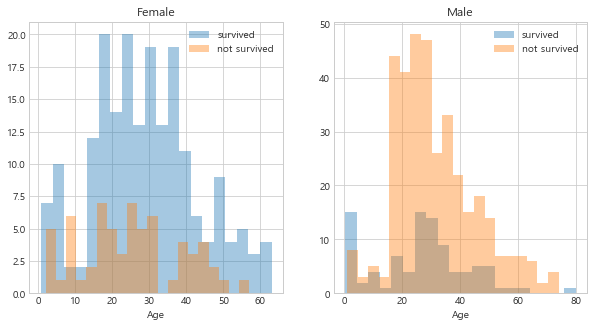

In [245]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
women , men = train_data.query("Sex=='female'"), train_data.query("Sex=='male'")
# distplot은 series가 온다.
sns.distplot(women.query('Survived==1').Age, ax=ax[0], label='survived', bins=20, kde=False)
sns.distplot(women.query('Survived==0').Age, ax=ax[0], label='not survived', bins=20, kde=False)
ax[0].legend()
ax[0].set_title('Female')

sns.distplot(men.query('Survived==1').Age, ax=ax[1], label='survived', bins=20, kde=False)
sns.distplot(men.query('Survived==0').Age, ax=ax[1], label='not survived', bins=20, kde=False)
ax[1].legend()
ax[1].set_title('Male')
plt.show()

## 남녀별, 나이별 생존자수 종합적으로 보기
* FacetGrid 활용

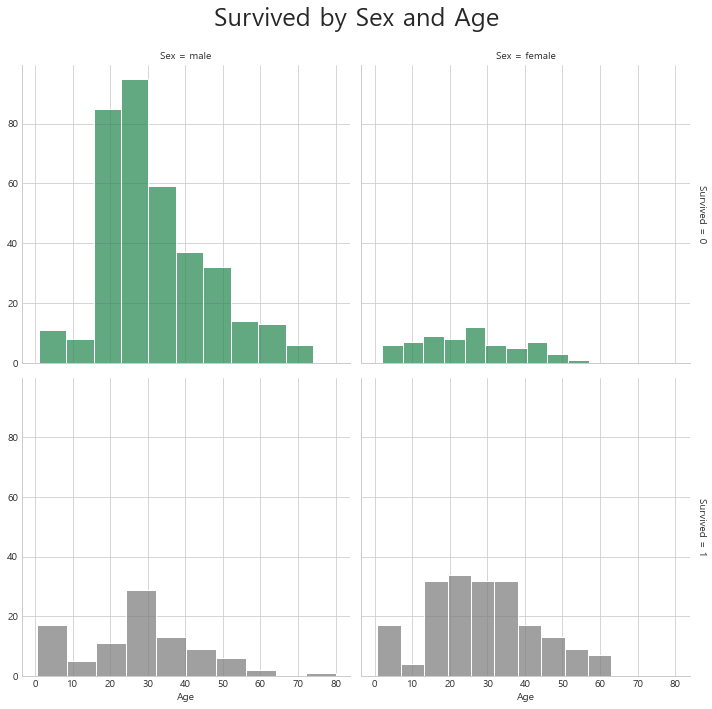

In [342]:
g = sns.FacetGrid(data=train_data, col='Sex', row='Survived', hue='Survived',
                  size=5, margin_titles=True, palette=['seagreen', 'grey'])
g.map(sns.histplot, 'Age', edgecolor='white', bins=10)
g.fig.suptitle('Survived by Sex and Age', size=25)
plt.subplots_adjust(top=0.9) # 제목과 그래프 간격 조정

## 나이별 생존자 비율 분포

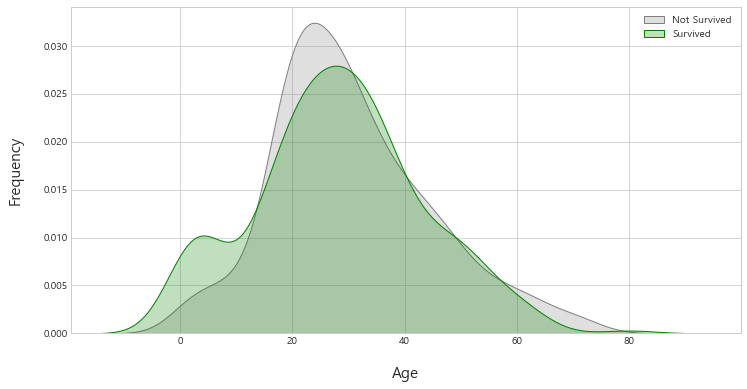

In [279]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=train_data.query('Survived==0')['Age'], shade=True, color='grey', label='Not Survived')
sns.kdeplot(data=train_data.query('Survived==1')['Age'], shade=True, color='green', label='Survived')

plt.xlabel('Age', fontsize=15, labelpad=20)
plt.ylabel('Frequency', fontsize=15, labelpad=20)

plt.legend()
plt.show()

## 이름에서 호칭만 빼내서 이를 남녀 숫자로 보기

In [315]:
def check_name(lst):
    for x in lst:
        if x[-1]=='.':
            return x[:-1]
    return np.nan

train_data['Initial'] = train_data.Name.str.split().map(check_name)
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,Miss
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S,Miss
425,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S,Mr
384,385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S,Mr
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S,Mr


In [318]:
pd.crosstab(index=train_data.Sex, columns=train_data.Initial).style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


## 스왐플롯으로 연령별 생존자 카운트 보기

<AxesSubplot:xlabel='Survived', ylabel='Age'>

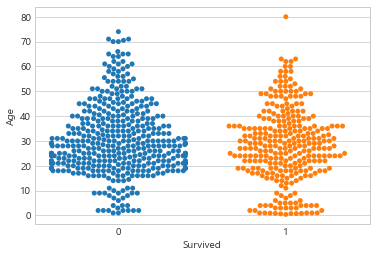

In [343]:
sns.swarmplot(data=train_data, x='Survived', y='Age')

## crosstab을 활용해 Pclass별 남녀별 생존자 확인

In [349]:
pd.crosstab(index=[train_data.Sex, train_data.Survived], columns=train_data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

## 바이올린 플롯으로 Pclass별 Age 생존카운드 및 Sex별 Age 생존 카운트

* boxplot 보다 좋은 점 중 하나로 **split** 기능이 있다.

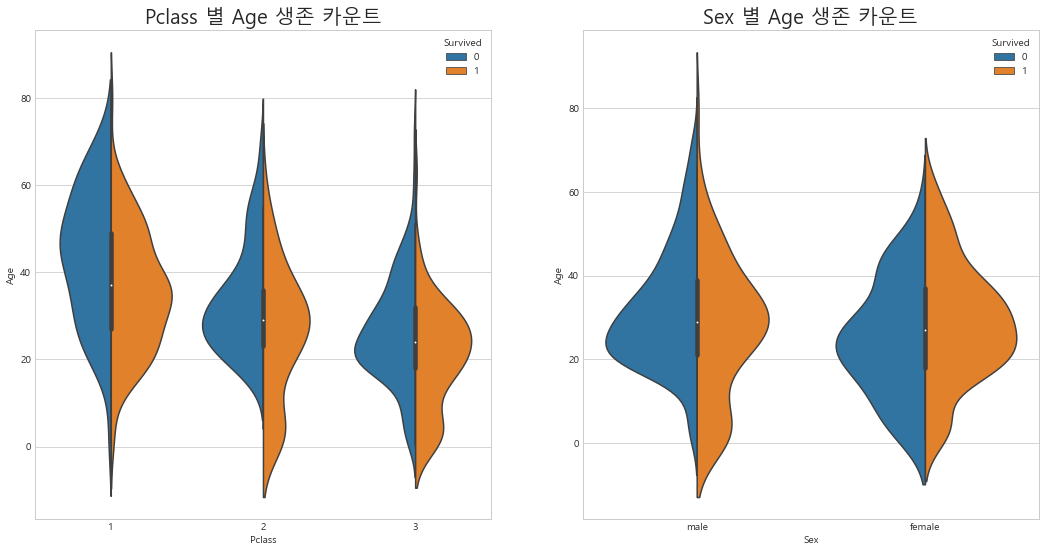

In [362]:
fig, ax = plt.subplots(1, 2, figsize=(18,9))
sns.violinplot(data=train_data, x='Pclass', y='Age', hue='Survived', split=True, ax=ax[0])
ax[0].set_title('Pclass 별 Age 생존 카운트', fontsize=20)

sns.violinplot(data=train_data, x='Sex', y='Age', hue='Survived', split=True, ax=ax[1])
ax[1].set_title('Sex 별 Age 생존 카운트', fontsize=20)

plt.show()

## Initial과 Fare 관계
* jointplot 그리기

In [392]:
initial_label, inital_idx = pd.factorize(train_data['Initial'])
train_data['Initial_label'] = initial_label

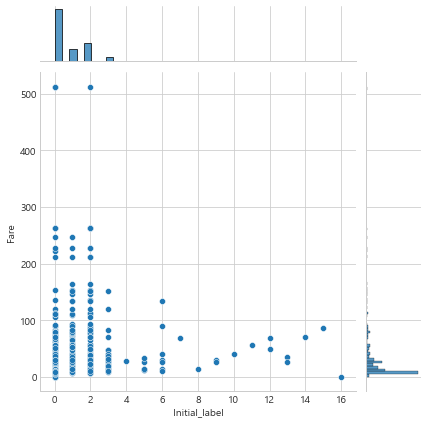

In [394]:
sns.jointplot(data=train_data, x='Initial_label', y='Fare', kind='scatter')
plt.show()

## relplot으로 'Initial'과 'Age'관계 보기
* relplot은 scatterplot과 lineplot의 상위 개념으로 두가지 모두 포함시킬 수 있다.
* relplot의 특징은 return이 FacetGrid이다.

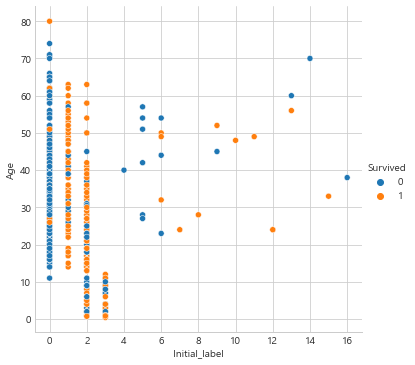

In [412]:
sns.relplot(data=train_data, x='Initial_label', y='Age', kind='scatter', hue='Survived')
plt.show()


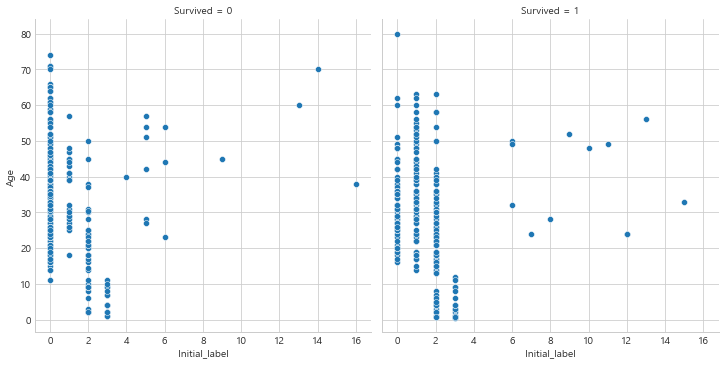

In [413]:
sns.relplot(data=train_data, x='Initial_label', y='Age', kind='scatter', col='Survived')
plt.show()

## SibSp 별 생존율 숫자로 보기

In [415]:
train_data.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

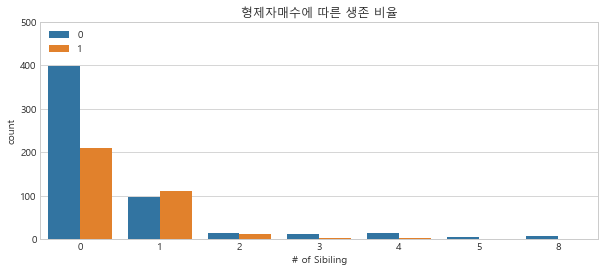

In [425]:
plt.figure(figsize=(10,4))
sns.countplot(data=train_data, x='SibSp', hue='Survived')
plt.ylim([0,500])
plt.xlabel('# of Sibiling')
plt.legend(loc='best')
plt.title('형제자매수에 따른 생존 비율')
plt.show()

## Parch(부모, 자식) 별 생존율 숫자로 보기


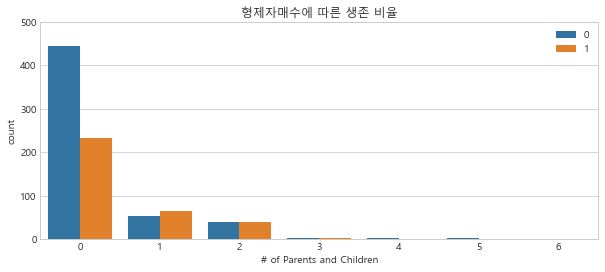

In [428]:
plt.figure(figsize=(10,4))
sns.countplot(data=train_data, x='Parch', hue='Survived')
plt.ylim([0,500])
plt.xlabel('# of Parents and Children')
plt.legend(loc=1)
plt.title('형제자매수에 따른 생존 비율')
plt.show()

## 가족 크기 별 생존 확률 보기

In [435]:
train_data['FamilySize'] = train_data['Parch'] + train_data['SibSp'] + 1
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Initial_label,FamilySize
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,Miss,2,4
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S,Mrs,1,2
158,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S,Mr,0,1
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,Miss,2,3
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S,Mr,0,1


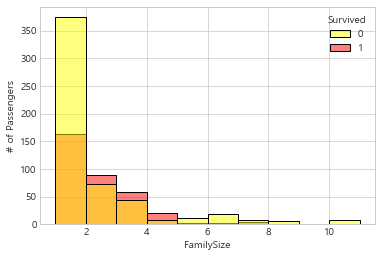

In [450]:
sns.histplot(data=train_data, x='FamilySize',hue='Survived', bins=10, palette=['yellow', 'red'])
plt.ylabel('# of Passengers')
plt.show()

## 바플롯이랑 포인트플롯으로 SibSp 별 생존 확률 보기

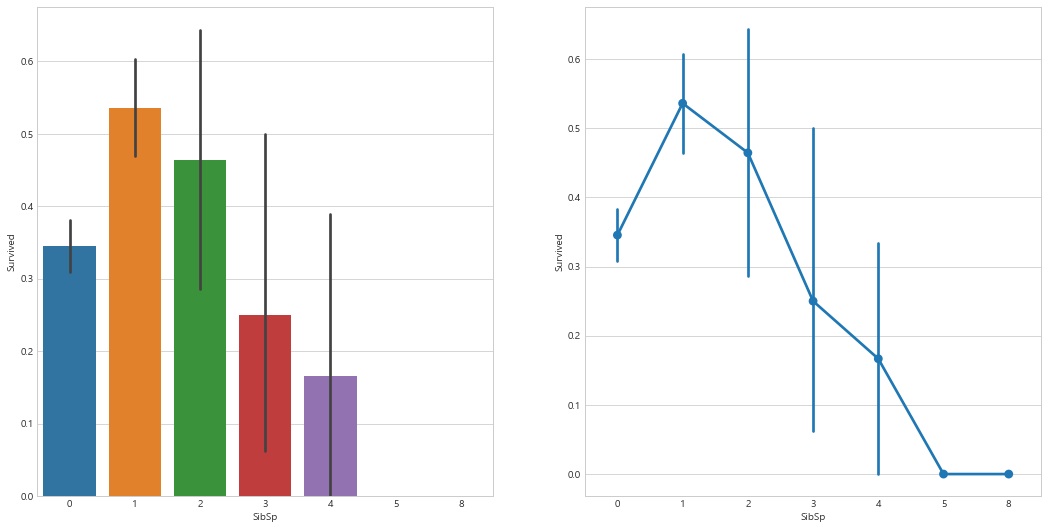

In [463]:
fig, ax = plt.subplots(1, 2, figsize=(18,9))
sns.barplot(data=train_data, x='SibSp', y='Survived', ax=ax[0])
sns.pointplot(data=train_data, x='SibSp', y='Survived', ax=ax[1])

plt.show()

## Pclass와 FamilySize relplot으로 살펴보기

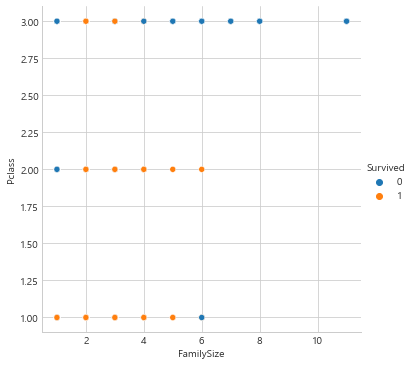

In [465]:
sns.relplot(data=train_data, x='FamilySize', y='Pclass', hue='Survived')

## 히스토그램으로 본 요금별 생존

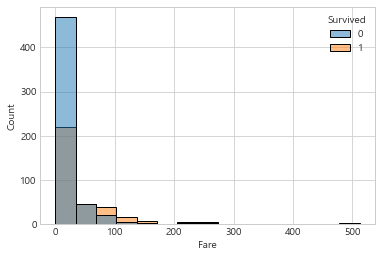

In [472]:
sns.histplot(data=train_data, x='Fare', hue='Survived', bins=15)
plt.show()

##  스왐플롯으로 본 Pclass 및 Fare로 본 생존 수

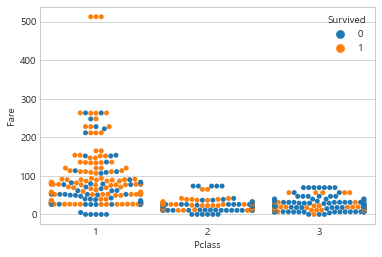

In [474]:
sns.swarmplot(data=train_data, x='Pclass', y='Fare', hue='Survived')
plt.show()

## 티켓 별 가격 스캐터 플롯으로 보기

In [478]:
train_data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [484]:
ticket_label , ticket_index = pd.factorize(train_data['Ticket'])
train_data['ticket_label'] = ticket_label

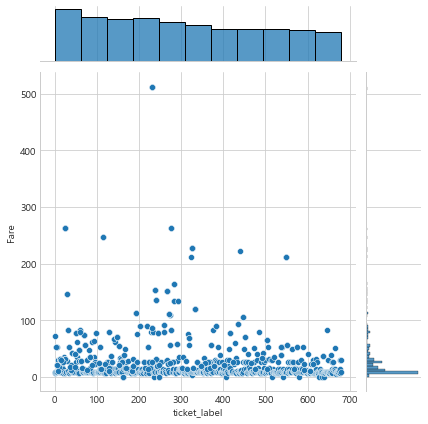

In [486]:
sns.jointplot(data=train_data, x='ticket_label', y='Fare', kind='scatter')
plt.show()

## Pclass 별 가격 regplot으로 보기

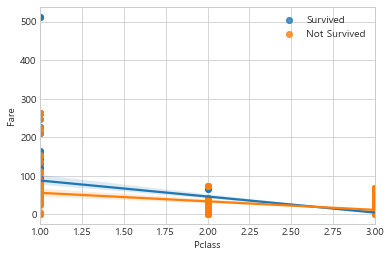

In [494]:
sns.regplot(data=train_data.query('Survived==1'), x='Pclass', y='Fare', label='Survived')
sns.regplot(data=train_data.query('Survived==0'), x='Pclass', y='Fare', label='Not Survived')
plt.legend()
plt.show()

## 티켓별 가격 catplot으로 보기
* catplot : strip, swarm, box, violin 등을 서브플롯으로 그릴 수 있는 메서드입니다.

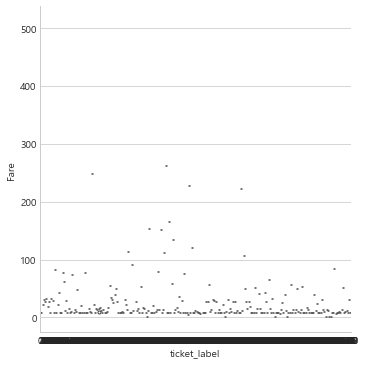

In [504]:
sns.catplot(data=train_data, x='ticket_label', y='Fare',kind='violin')

## Fare빈도 생존별로 kdeplot으로 보기

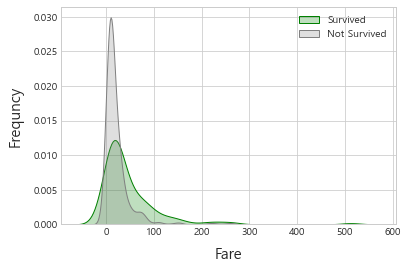

In [515]:
sns.kdeplot(x=train_data.query('Survived==1')['Fare'], color='green', shade=True, label='Survived')
sns.kdeplot(x=train_data.query('Survived==0')['Fare'], color='grey', shade=True, label='Not Survived')
plt.legend()
plt.ylabel('Frequncy', fontsize=15, labelpad=10)
plt.xlabel('Fare', fontsize=15, labelpad=10)
plt.show()

## 팩토플롯으로 본 Embarked별 생존 현황

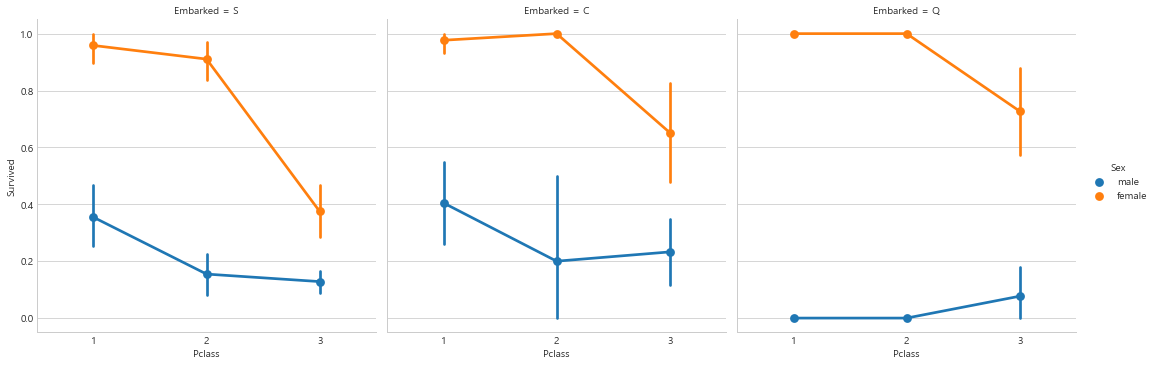

In [522]:
sns.factorplot(data=train_data, x='Pclass', y='Survived', col='Embarked', hue='Sex')
plt.show()

# Data Visualization in Feature Engineer

## 새로운 데이터만들기

In [566]:
temp = pd.DataFrame()
temp['Survived'] = train_data.Survived
temp['Name'] = pd.factorize(train_data.Initial)[0]
temp['Gender'] = pd.factorize(train_data.Sex)[0]
temp['Age'] = train_data.Age
temp['Pclass'] = train_data.Pclass
temp['Family'] = train_data.FamilySize
temp['Ticket'] = train_data.ticket_label
temp['Fare'] = train_data.Fare
temp['Cabin'] = pd.factorize(train_data.Fare)[0]
temp['Embarked'] = pd.factorize(train_data.Embarked)[0]
temp.head()

,Survived,Name,Gender,Age,Pclass,Family,Ticket,Fare,Cabin,Embarked
0,0,0,0,22.0,3,2,0,7.2500,0,0
1,1,1,1,38.0,1,2,1,71.2833,1,1
2,1,2,1,26.0,3,1,2,7.9250,2,0
3,1,1,1,35.0,1,2,3,53.1000,3,0
4,0,0,0,35.0,3,1,4,8.0500,4,0


In [558]:
temp.isnull().sum()

Survived      0
Name          0
Gender        0
Age         177
Pclass        0
Family        0
Ticket        0
Fare          0
Cabin         0
Embarked      0
dtype: int64

## Heatmap

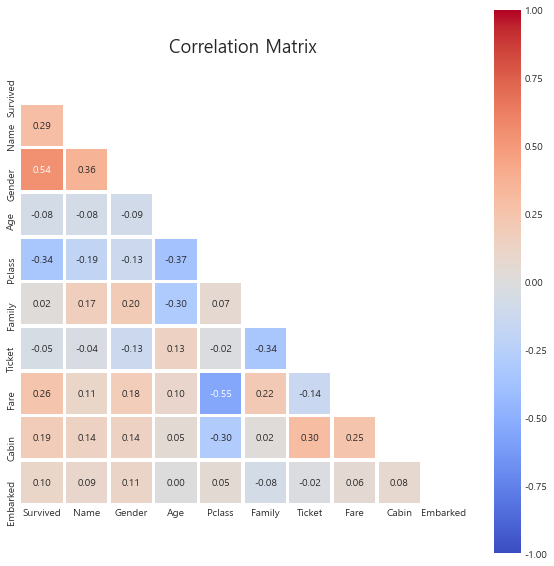

In [545]:
corr = temp.corr() # 상관계수 계산

plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr, dtype=bool)) # 하삼각행렬 마스크 
sns.heatmap(corr, mask=mask, cmap='coolwarm',vmin=-1, vmax=1,
            square=True, linewidths=2.5, annot=True, fmt='.2f')
plt.title('Correlation Matrix', fontsize=18)
plt.show()

## Pclass를 Pclass 생존에 대한 연속값(생존의 평균)으로 변경

In [554]:
temp.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [567]:
temp['Pclass'] = temp.groupby('Pclass')['Survived'].transform('mean')
temp.sample(5)

,Survived,Name,Gender,Age,Pclass,Family,Ticket,Fare,Cabin,Embarked
454,0,0,0,NaN,0.242363,1,384,8.0500,4,0
644,1,2,1,0.75,0.242363,4,379,19.2583,178,1
168,0,0,0,NaN,0.629630,1,155,25.9250,99,0
659,0,0,0,58.00,0.629630,3,193,113.2750,114,1
746,0,0,0,16.00,0.242363,3,248,20.2500,134,0


In [561]:
pd.crosstab(temp.Pclass, temp.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
0.24236252545824846,372,119,491
0.47282608695652173,97,87,184
0.6296296296296297,80,136,216
All,549,342,891


## Age를 Age 생존에 대한 연속값(생존의 평균)으로 변경

In [568]:
temp.groupby('Age')['Survived'].mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

In [569]:
temp['Age'] = temp.groupby('Age')['Survived'].transform('mean')
temp.head()

,Survived,Name,Gender,Age,Pclass,Family,Ticket,Fare,Cabin,Embarked
0,0,0,0,0.407407,0.242363,2,0,7.2500,0,0
1,1,1,1,0.454545,0.629630,2,1,71.2833,1,1
2,1,2,1,0.333333,0.242363,1,2,7.9250,2,0
3,1,1,1,0.611111,0.629630,2,3,53.1000,3,0
4,0,0,0,0.611111,0.242363,1,4,8.0500,4,0


In [570]:
pd.crosstab(temp.Age, temp.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Age,,,
0.0,39,0,39
0.1111111111111111,8,1,9
0.16666666666666666,5,1,6
0.2,16,4,20
0.20833333333333334,19,5,24
0.25,9,3,12
0.2608695652173913,17,6,23
0.28,18,7,25
0.2857142857142857,5,2,7


## Ticket을 Ticket 생존에 대한 연속값(생존의 평균)으로 변경

In [573]:
temp.groupby('Ticket').Survived.mean()

Ticket
0      0.0
1      1.0
2      1.0
3      0.5
4      0.0
      ... 
676    0.0
677    0.0
678    1.0
679    1.0
680    0.0
Name: Survived, Length: 681, dtype: float64

In [574]:
temp['Ticket'] = temp.groupby('Ticket')['Survived'].transform('mean')
temp.tail()

,Survived,Name,Gender,Age,Pclass,Family,Ticket,Fare,Cabin,Embarked
886,0,5,0,0.611111,0.472826,1,0.0,13.00,16,0
887,1,2,1,0.360000,0.629630,1,1.0,30.00,209,0
888,0,2,1,NaN,0.242363,4,0.0,23.45,231,0
889,1,0,0,0.333333,0.629630,1,1.0,30.00,209,1
890,0,0,0,0.500000,0.242363,1,0.0,7.75,28,2


In [575]:
pd.crosstab(temp.Ticket,temp.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Ticket,,,
0.0,494,0,494
0.25,3,1,4
0.3333333333333333,2,1,3
0.5,34,34,68
0.6666666666666666,11,22,33
0.7142857142857143,2,5,7
0.75,3,9,12
1.0,0,270,270
All,549,342,891


## Pairplot으로 본 각 항목당의 1:1 그래프 보기

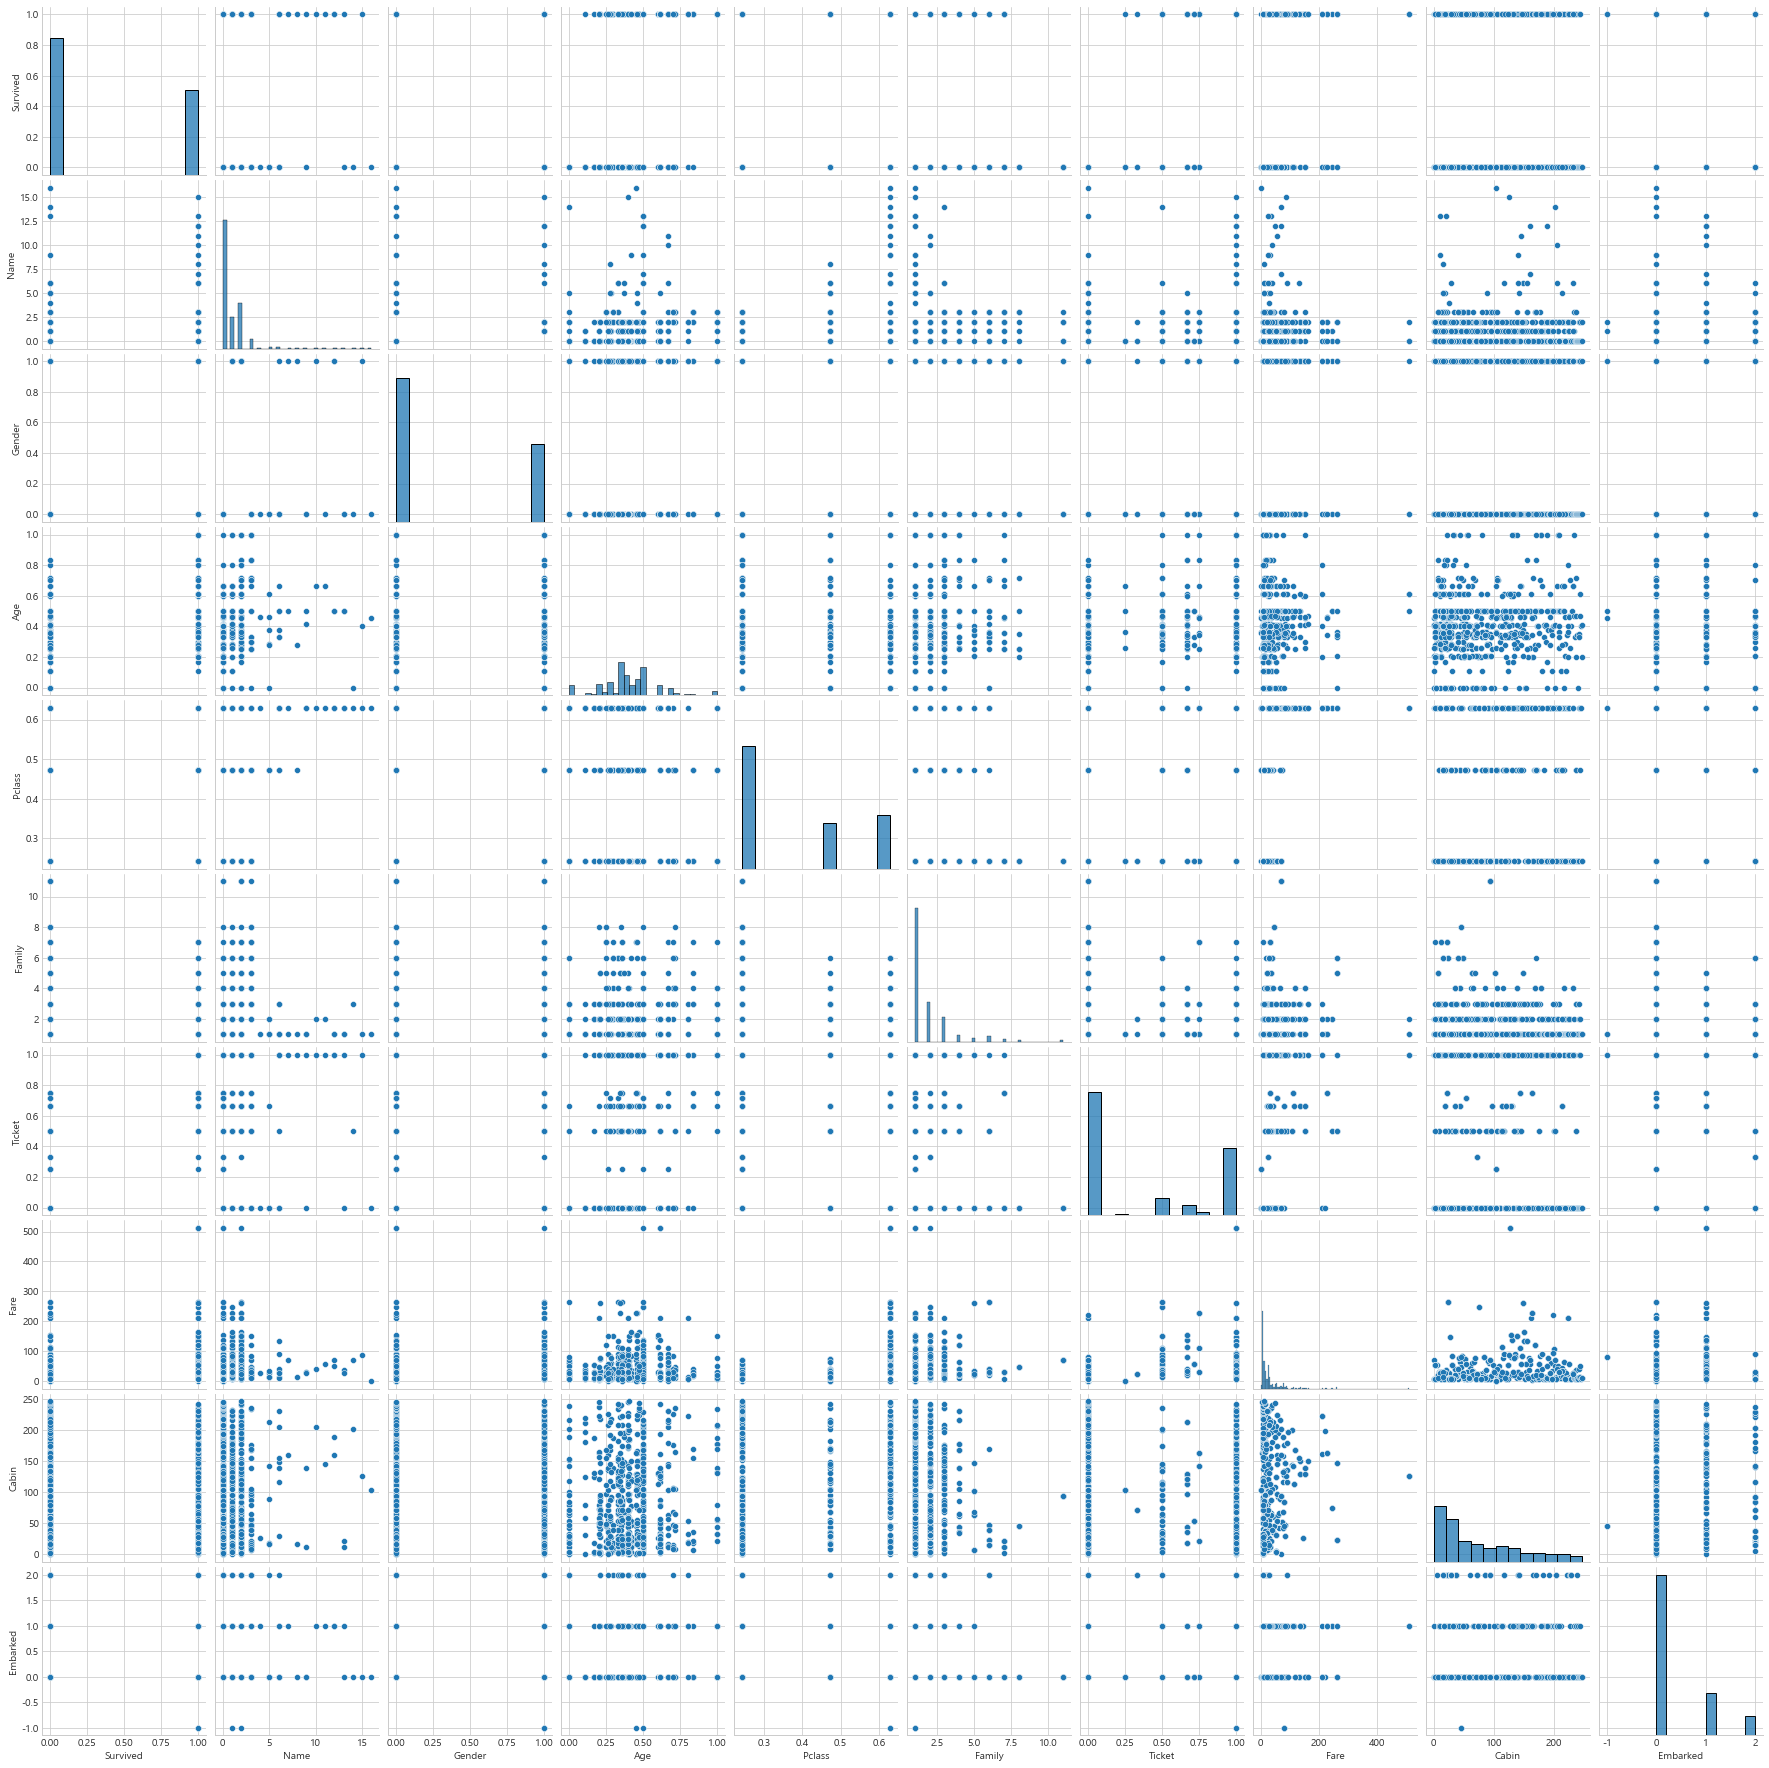

In [576]:
sns.pairplot(temp)